In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from cmapPy.pandasGEXpress.parse import parse

from scipy.stats import spearmanr as scor
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu as mwu

from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import auc as AUC
from sklearn.metrics import precision_recall_curve as PRC

# Importing data for comparison

In [2]:
#Importing CREEDs benchmark data files 
gene_perturb=pd.read_csv('../results/gene_pert.csv', sep=',', index_col=0, header=0)
drug_perturb=pd.read_csv('../results/drug_pert.csv', sep=',', index_col=0, header=0)
gene_meta=pd.read_csv('../results/gene_perturb.csv', sep=',', index_col=0, header=0)
drug_meta=pd.read_csv('../results/drug_perturb.csv', sep=',', index_col=0, header=0)

In [3]:
#Checking the absolut values of the benchmark data also
gene_perturb_A=gene_perturb.abs()
drug_perturb_A=drug_perturb.abs()
gene_perturb_A.to_csv('../results/gene_pert_A.csv', sep=',')
drug_perturb_A.to_csv('../results/drug_pert_A.csv', sep=',')

In [4]:
#Importing the NicheNet model
nn_model=pd.read_csv('../data/ligand_target_matrix.csv', sep=',', header=0, index_col=0)
nn_model = nn_model.reindex(sorted(nn_model.columns), axis=1)

In [5]:
lr_network=pd.read_csv('../data/lr_network.csv', sep=',', header=0, index_col=0)
good_source = ['kegg_cytokines', 'kegg_cams', 'kegg_neuroactive', 'kegg_ecm', 'pharmacology', 'ramilowski_known']
lr_network = lr_network[np.in1d(lr_network['source'], good_source)]

In [6]:
#Drugs from Drug Repurposing Hub
drugs=pd.read_csv('../results/lincs_drugs_act_inhib.csv', sep=',', header=0, index_col=0)
#list(drugs['pert_iname'].unique())

In [7]:
#Importing LINCS perturbation signatures 
consig_gse70138_trt_cp=pd.read_csv('../results/consensus_signature_gse70138_trt_cp.csv', header=0, sep=',', index_col=0)
consig_gse70138_trt_xpr=pd.read_csv('../results/consensus_signature_gse70138_trt_xpr.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_cp=pd.read_csv('../results/consensus_signature_gse92742_trt_cp.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_lig=pd.read_csv('../results/consensus_signature_gse92742_trt_lig.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_oe=pd.read_csv('../results/consensus_signature_gse92742_trt_oe.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_sh=pd.read_csv('../results/consensus_signature_gse92742_trt_sh.csv', header=0, sep=',', index_col=0)
consig_gse92742_trt_sh_fil=pd.read_csv('../results/consensus_signature_gse92742_trt_sh_fil.csv', header=0, sep=',', index_col=0)
consig_drugs=pd.read_csv('../results/consensus_signature_trt_drugs.csv', header=0, sep=',', index_col=0)

In [8]:
#Checking the absolut values of LINCS also
consig_gse70138_trt_cp_A=consig_gse70138_trt_cp.abs()
consig_gse70138_trt_xpr_A=consig_gse70138_trt_xpr.abs()
consig_gse92742_trt_cp_A=consig_gse92742_trt_cp.abs()
consig_gse92742_trt_lig_A=consig_gse92742_trt_lig.abs()
consig_gse92742_trt_oe_A=consig_gse92742_trt_oe.abs()
consig_gse92742_trt_sh_A=consig_gse92742_trt_sh.abs()
consig_gse92742_trt_sh_fil_A=consig_gse92742_trt_sh_fil.abs()
consig_drugs_A=consig_drugs.abs()

In [9]:
consig_gse70138_trt_xpr=consig_gse70138_trt_xpr.T
consig_gse92742_trt_lig=consig_gse92742_trt_lig.T
consig_gse92742_trt_oe=consig_gse92742_trt_oe.T
consig_gse92742_trt_sh=consig_gse92742_trt_sh.T
consig_gse92742_trt_sh_fil=consig_gse92742_trt_sh_fil.T
consig_drugs=consig_drugs.T

consig_gse70138_trt_xpr_A=consig_gse70138_trt_xpr_A.T
consig_gse92742_trt_lig_A=consig_gse92742_trt_lig_A.T
consig_gse92742_trt_oe_A=consig_gse92742_trt_oe_A.T
consig_gse92742_trt_sh_A=consig_gse92742_trt_sh_A.T
consig_gse92742_trt_sh_fil_A=consig_gse92742_trt_sh_fil_A.T
consig_drugs_A=consig_drugs_A.T

Filtering single gene perturbations by their target

In [10]:
meta=pd.read_csv('../results/gene_perturb.csv', sep=',', index_col=0, header=0)

In [11]:
good_cell=['Osteoclasts', 'glioma cells', 'mammary gland','B cells', 
           'MCF10A', 'CD71+ bone marrow cells', 'MEFs', 'primary hepatocytes, HGF stimulation',
       'Macrovascular umbilical vein endothelial cells', 'MDA-MB-231',
       'A375 melanoma cell-line', 'M24met melanoma cell-line',
       'astrocytes', 'PC12','FACS purified YFP+ muscle stem cells', 'hepatocellular carcinoma',
           'RT112','cord blood CD34+ cells', 'MCF10', 'murine lung tissue',
       'Estrogen receptor (ER) alpha positive MCF-7 breast cancer cells',
       'RT112 - Bladder cancer cell line - (shRNA 2-4)',
       'RT112 - Bladder cancer cell line (shRNA 4-1)', 'liver tissue, n-nitrosodiethylamine treatment', 'Liver tissue',
        'Hair follicles','liver tissue,  n-nitrosodiethylamine treatment',
        'spleen CD11b Dendritic cells', 'Analysis of PBMCs from patients with clinically isolated syndrome suggestive of multiple sclerosis (CIS)',
       'CD8+ T cells','Esophageal epithelial cells from eosinophilic esophagitis patients',
       'RT112 - Bladder cancer cell line (shRNA 6-16)',
       'pulmonary vascular microendothelial cells (PMVEC)',
       'bone marrow-derived mast cells','HT29',
       'Embryonic palatal mesenchymal cells', 'tumor-associated monocytic cells (CD11b+Gr1-)',
       'tumor-associated granulocytes (CD11b+Gr1+)',
       'isolated parietal cells (stomach)', 'Colorectal adenocarcinoma',
        'OT-I T cells from spleen','SHEP-SF neuroblastoma', 'mammary epithelial cells', 
        'osteoblasts (7 days)', 'ES cells (N2B27 media)',
       'ES cells','Prostate luminal epithelial cells',
       'Wildtype embryo fibroblasts (MEFs)','E16 primary cortical neuron cultures',
       'cell line: Mkn28 cell type: human gastric tubular adenocarcinoma tissue origin: stomach (70 year-old female)  overexpressing canonical CDH1',
       'cell line: MDA-MB-231 cell type: Breast cancer cells','MCF-7', 'Analysis of blood monocytes differentiated to macrophages (MP)',
        'MKN28', 'mesenchymal cells', 'esophageal keratinocytes EPC2-hTERT',
       'Mkn28 gastric tubular adenocarcinoma cell line','Keratinocytes', 'HEK001', 'HEK293',
        'endometrial stromal cells','Embryonic palatal tissue', 'Microvascular endothelial cells',
       'Renal mesangial cells', 'primary hepatocytes', 'keratinocytes',
       'OCUBM cells, mammary gland Breast Cancer', 'CL1-0','TL3 Anaplastic thyroid carcinoma', 'whole uterine tissues',
       'CD9+ trophoblast cells','Ewing family tumor (EFT) cell line A673', 
        'embryonic stem cells', 'MCF10A - immortalized breast epithelial cell line',
       'Preovulatory granulosa cell','HTH83 Anaplastic thyroid carcinoma',
       'cell line: MDA-MB-231 breast cancer cell line','SK-BR-3 breast cancer cells, TFPI alpha isoform',
       'SK-BR-3 breast cancer cells, TFPI beta isoform','myeloid-derived suppressor cell from colon tumor',
       'myeloid-derived suppressor cell from bone marrow','CD4+/8+ cells','3T3', 'MGHU3',
        'Analysis of resected liver from hepatocellular carcinoma (HCC) patients with chronic hepatitis C (CHC)',
       'Analysis of HUVECs', 'T47D','gastrointestinal stromal tumors','melanocytes','CD8-IGF1R 3T3',
       'cell culture: grade VI GBM short term cultures IN1760','cell culture: grade VI GBM short term cultures IN1472',
       'OT-I T cells from tumors','bone-marrow derived macrophages','HCT116 cells',
        'MOLT4 (T-cell acute lymphoblast leukemia) cells', 'LN229' , 'CUTLL1  MigR1 transduced (T-lymphoblastic leukemia) cell line',
           'CUTLL1  (T-lymphoblastic leukemia) cell line', 'Macrophages extracted from peritoneal cavity of wildtype and mutant (IL4--) mice infected with nematode',
           'MCF10A - mammary epithelial cells (samples from 1.5 to 9 days)','bone marrow stromal cells', 
         'DAOY medulloblastoma cells', 'bone marrow stromal cells,TGFb stimulation',
           'CUTLL1 DN-MAML transduced (T-lymphoblastic leukemia) cell line','Colon epithelium, 12 weeks of age',
          'Xenograft tumors from KPL4', 'Xenograft tumors from  NCI-H1650', 'Xenograft tumors from DU145', 'Colon cancer tumor, CBA/C57BL/6',
           'CD4+ T cells from spleen at 1 month', 'strain: 129/Sv tissue: madibular condyle cartilage', 'brown adipose tissue of ob/ob mice', 'epididymal fat', 'olfactory epithelium','Colon epithelium, 12 weeks of age', 'Bone Marrow', 'SUDHL-1']

In [12]:
bad_cell=[ 'heart','skin exposed to 6hr UV', 'Hippocampi', 
          'skin exposed to 24hr UV','vestibular organ, day P90','Colon, 4 weeks, C57BL/6J',
          'Colon, 4 weeks, C3H/HeJBir' ,'liver','Limb bud', 'kidney',
       'spleen at 1 month', 'spleen at 4 month', 'thyroid','gallbladder','cerebellum, 4w',
       'cerebrum, 20d','cerebrum, 10d', 'Ovary' , 'liver, female', 
          'liver, male', 'retina','chimeric kidney harvested at day E15.5',
        'Lung', 'lung','Kidney', 'neuron', 'cerebellum, 0d', 'endothelium', 'cerebrum, 12w', 
          'cerebellum, 18w', 'cerebrum, 0d', 'cerebrum, 4w', 
          'colon after 5% DSS treatment for induction of IBD mouse model', 'cerebellum', 'Brain',
          'Cerebral microvascular fragments', 'Diaphragm (from dystrophia muscularis -dy/dy- mouse model)',
          'corneas', 'skeletal muscle', 'Uterus', 'Skeletal muscle of patients',
          'Ileum', 'posterior palate', 'Skeletal muscle', 'lung following SB inflammatory injury',
          'lung following VILI inflammatory injury', 'mammary organoids', 'Kidneys', 'unknown', 
          'MMTV-Wnt-1 transgenic mice', 'ovary' 'Colon epithelium, 6 weeks of age',
          'Colon, 6 weeks of age', 'Colon, 12 weeks of age', 'vestibular organ, day P15', 
          'vestibular organ, day E18.5', 'Mammary gland', 'cerebellum, 12w', 'Colon', 
          'posterior second heart field, day E9.5', 'embryonic tongue', 'aorta', 'prefrontal cortex',
          'Heart', 'Hind limb skeletal muscle (4-week old dy3K/dy3K animals)', 'small intestine',
          'cerebellum, 10d', 'cerebellum, 20d' 'liver (after high fat diet for 8 weeks)', 'embryonic kidney' ]

In [13]:
meta.head()

,cell_type,chdir_norm,ctrl_ids,curator,geo_id,hs_gene_symbol,mm_gene_symbol,organism,pert_ids,pert_type,platform,version,sign
1928,brown adipose tissue of ob/ob mice,NaN,GSM800590|GSM800591|GSM800592|GSM800593|GSM800...,Andrew,GSE32316,FGFR1,Fgfr1,mouse,GSM800596|GSM800597|GSM800598|GSM800599|GSM800...,drugactivation,GPL1261,1.0,0
2347,heart,NaN,GSM360098|GSM360099|GSM360100,nbongio,GSE14411,ITGB1,Itgb1,mouse,GSM360101|GSM360102|GSM360103,KO,GPL6246,1.0,-1
2584,Osteoclasts,NaN,GSM1487524|GSM1487525|GSM1487526,maroulisv,GSE60761,CALCR,Calcr,mouse,GSM1487530|GSM1487531|GSM1487532,KO,GPL1261,1.0,-1
2589,glioma cells,NaN,GSM1498939|GSM1498940|GSM1498941,NaN,GSE61178,KDR,Kdr,human,GSM1498942|GSM1498943|GSM1498944,KD,GPL10558,1.0,-1
1852,mammary gland,NaN,GSM72723|GSM72730|GSM72795|GSM72877,Andrew,GSE3260,FGFR1,Fgfr1,mouse,GSM72726|GSM72727|GSM72789|GSM72793|GSM72869,activemutant,GPL81,1.0,1


In [14]:
len(list(meta['cell_type'].unique()))

187

In [15]:
type(good_cell)

list

In [16]:
fil=np.in1d(meta['cell_type'], good_cell)
gene_pert_good=meta[fil]

In [17]:
gene_pert_good.head()

,cell_type,chdir_norm,ctrl_ids,curator,geo_id,hs_gene_symbol,mm_gene_symbol,organism,pert_ids,pert_type,platform,version,sign
1928,brown adipose tissue of ob/ob mice,NaN,GSM800590|GSM800591|GSM800592|GSM800593|GSM800...,Andrew,GSE32316,FGFR1,Fgfr1,mouse,GSM800596|GSM800597|GSM800598|GSM800599|GSM800...,drugactivation,GPL1261,1.0,0
2584,Osteoclasts,NaN,GSM1487524|GSM1487525|GSM1487526,maroulisv,GSE60761,CALCR,Calcr,mouse,GSM1487530|GSM1487531|GSM1487532,KO,GPL1261,1.0,-1
2589,glioma cells,NaN,GSM1498939|GSM1498940|GSM1498941,NaN,GSE61178,KDR,Kdr,human,GSM1498942|GSM1498943|GSM1498944,KD,GPL10558,1.0,-1
1852,mammary gland,NaN,GSM72723|GSM72730|GSM72795|GSM72877,Andrew,GSE3260,FGFR1,Fgfr1,mouse,GSM72726|GSM72727|GSM72789|GSM72793|GSM72869,activemutant,GPL81,1.0,1
1850,mammary gland,NaN,GSM72723|GSM72730|GSM72795|GSM72877,Andrew,GSE3260,FGFR1,Fgfr1,mouse,GSM72724|GSM72787|GSM72794|GSM72876,activemutant,GPL81,1.0,1


In [18]:
fil=np.in1d(gene_perturb.index, gene_pert_good['hs_gene_symbol'])
gene_perturb_good=gene_perturb[fil]

In [19]:
gene_perturb_good_A=gene_perturb_good.abs()

### Single drug CREEDS heatmap

In [36]:
drug_perturb

,1416,1074,925,345,551,750,885,1584,1585,636,...,1912,552,1362,668,697,1369,550,1579,1219,1514
HSPD1,-0.977902,-0.495226,2.645156,-1.402658,-0.472635,1.171039,0.371829,-2.950343,-2.950343,-1.217178,...,-3.405230,-0.113964,-0.548385,-0.583012,-1.683659,-3.103644,-0.780401,0.519419,0.135799,-1.124970
C1QTNF6,-0.812820,-0.395383,1.038499,0.287884,-0.176610,-1.260067,3.139442,-0.123518,-0.123518,0.392044,...,-1.172718,0.917352,-2.947168,-1.801547,0.832710,8.257347,1.014694,-1.261224,-0.918467,0.279741
TANGO6,-1.347119,0.798411,-0.835500,-0.277805,0.355813,0.649659,1.018080,0.739773,0.739773,-0.549202,...,-0.833089,0.667091,-1.194884,-1.649035,0.997228,8.527643,-2.027916,0.580672,-0.747719,-0.688254
ACIN1,-0.741827,0.599398,0.202811,-0.213735,0.010692,-0.071792,8.024920,1.425588,1.425588,-0.907158,...,0.028910,-0.841475,-0.137936,0.145820,0.198583,-7.185948,0.495708,0.044030,-0.002079,-0.186203
EBAG9,-0.267233,0.962713,0.970027,-0.092120,0.546296,-1.401199,-0.947189,1.786996,1.786996,0.502146,...,0.233708,0.172293,-0.873505,0.487397,-1.622473,1.689068,-3.106171,-1.549363,-0.570498,-0.181124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COMP,0.113174,-2.297470,-0.546279,0.372331,1.337586,1.534462,1.049377,1.438318,1.438318,-1.617112,...,0.067918,0.393438,1.387687,4.341017,0.391137,0.403279,-0.911899,0.282464,-0.993456,0.075333
POMC,0.083734,-1.283736,-1.522173,0.261264,-0.758168,0.536297,2.166779,0.725726,0.725726,-1.466509,...,-1.392520,1.390610,1.653663,0.438332,0.791268,-2.357944,-0.200029,-0.490870,2.203952,0.846940
TRA2B,-0.146213,0.959273,1.539276,-1.177394,0.361115,3.059752,-1.805891,-0.648172,-0.648172,-0.533938,...,-2.727863,-0.351405,0.959477,0.230524,-0.731791,-0.517571,-2.967414,0.674418,0.791235,-0.437711
PTPA,0.059637,-1.174207,0.667468,-0.423984,-0.217675,-0.183868,2.669919,-0.496450,-0.496450,-1.004140,...,1.819967,2.456579,-0.692096,1.868919,-1.169484,-3.201584,1.609274,0.565937,0.163621,0.627112


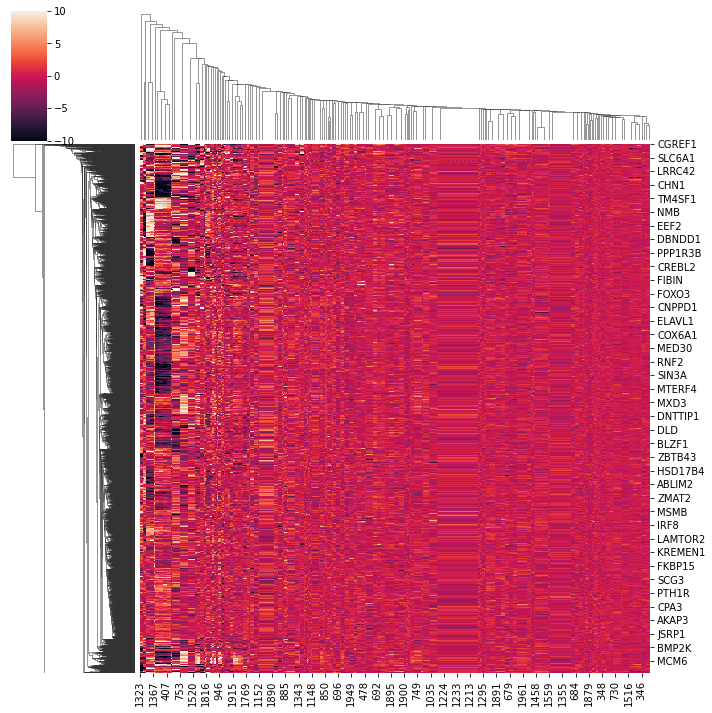

In [44]:
sns.clustermap(data= drug_perturb, vmin= -10 , vmax= 10 )
plt.savefig('../pictures/CREEDS_heatmap')

# NicheNet vs. CREEDs

### NN vs. drug_perturb

In [19]:
drug_perturb.shape

(7781, 387)

In [20]:
nn_model.shape

(25345, 688)

In [21]:
common_genes=list(set(nn_model.index)& set(drug_perturb.index))

In [22]:
len(common_genes)

7727

In [23]:
nn_model_d=nn_model.loc[common_genes]
drug_perturb=drug_perturb.loc[common_genes]
drug_perturb_A=drug_perturb_A.loc[common_genes]

In [24]:
drug_perturb.shape

(7727, 387)

In [25]:
nn_model.shape

(25345, 688)

In [26]:
drug_perturb.head()

,1416,1074,925,345,551,750,885,1584,1585,636,...,1912,552,1362,668,697,1369,550,1579,1219,1514
HCRT,-1.615697,-1.304226,-0.578023,0.313699,-1.364828,0.581217,-0.557819,-1.144537,-1.144537,2.637469,...,-0.775495,0.432731,-0.557437,0.636516,0.352894,0.666354,-0.770200,-0.737432,-1.342257,-0.384703
PDGFRA,0.775192,-1.597716,0.520640,-0.716028,0.837304,-0.677206,0.694026,-1.069740,-1.069740,0.071483,...,-0.039225,-2.558517,-0.062795,-1.699781,-1.651697,-3.315556,1.092153,0.351902,0.197850,-0.138003
PTBP1,0.840309,0.107598,2.195378,-1.850334,0.427877,1.403320,0.555971,0.966287,0.966287,0.221241,...,-4.277056,-0.606612,0.293506,0.309611,-0.396885,0.300069,2.589099,0.144974,-0.709990,0.337662
POC1A,-2.074402,0.810895,0.377143,0.347974,0.399909,0.896148,-0.059619,-1.450051,-1.450051,-1.081151,...,-0.069288,0.190305,-0.963903,-0.066019,0.171330,2.425822,-1.293407,-2.887512,1.403351,0.451069
CXCR2,-1.005128,-3.273582,3.010253,1.892088,0.076710,0.998330,1.120946,0.496739,0.496739,0.822002,...,0.942302,-2.205607,-0.654225,-0.734861,-0.324419,0.312700,1.047724,1.814135,1.022518,1.025435


In [27]:
drug_NN=pd.DataFrame(index=nn_model_d.columns, columns=drug_perturb.columns)
drug_A_NN=pd.DataFrame(index=nn_model_d.columns, columns=drug_perturb_A.columns)

In [28]:
drug_NN.head()

,1416,1074,925,345,551,750,885,1584,1585,636,...,1912,552,1362,668,697,1369,550,1579,1219,1514
A2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AANAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAM17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
for lig in drug_NN.index:
    for exp in drug_NN.columns:
        r=pearsonr(nn_model_d[lig],drug_perturb[exp])
        r=r[0]
        drug_NN.loc[lig,exp]=r

C:\Users\nidik\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [30]:
for lig in drug_A_NN.index:
    for exp in drug_A_NN.columns:
        r=pearsonr(nn_model_d[lig],drug_perturb_A[exp])
        r=r[0]
        drug_A_NN.loc[lig,exp]=r

In [31]:
drug_NN.to_csv('../results/drug_NN_sim.csv', sep=',')
drug_A_NN.to_csv('../results/drug_A_NN_sim.csv', sep=',')

### NN vs. gene_perturb

In [32]:
common_genes=list(set(nn_model.index)& set(gene_perturb.index))
len(common_genes)

11011

In [33]:
nn_modell=nn_model.loc[common_genes]
gene_perturb=gene_perturb.loc[common_genes]
gene_perturb_A=gene_perturb_A.loc[common_genes]

In [34]:
gene_NN=pd.DataFrame(index=nn_modell.columns, columns=gene_perturb.columns)
gene_A_NN=pd.DataFrame(index=nn_modell.columns, columns=gene_perturb_A.columns)

In [35]:
for lig in gene_NN.index:
    for exp in gene_NN.columns:
        r=pearsonr(nn_modell[lig],gene_perturb[exp])
        r=r[0]
        gene_NN.loc[lig,exp]=r

In [36]:
for lig in gene_A_NN.index:
    for exp in gene_A_NN.columns:
        r=pearsonr(nn_modell[lig],gene_perturb_A[exp])
        r=r[0]
        gene_A_NN.loc[lig,exp]=r

### NN vs. filtered gene_perturb

In [37]:
common_genes=list(set(nn_model.index)& set(gene_perturb_good.index))
len(common_genes)

56

In [38]:
nn=nn_model.loc[common_genes]
gene_perturb_good=gene_perturb_good.loc[common_genes]
gene_perturb_good_A=gene_perturb_good_A.loc[common_genes]

In [39]:
filgene_NN=pd.DataFrame(index=nn.columns, columns=gene_perturb_good.columns)
filgene_A_NN=pd.DataFrame(index=nn.columns, columns=gene_perturb_good_A.columns)

In [40]:
for lig in filgene_NN.index:
    for exp in filgene_NN.columns:
        r=pearsonr(nn[lig],gene_perturb_good[exp])
        r=r[0]
        filgene_NN.loc[lig,exp]=r

In [41]:
for lig in filgene_A_NN.index:
    for exp in filgene_A_NN.columns:
        r=pearsonr(nn[lig],gene_perturb_good_A[exp])
        r=r[0]
        filgene_A_NN.loc[lig,exp]=r

In [42]:
filgene_NN.to_csv('../results/gene_filt_NN_sim.csv', sep=',')
filgene_A_NN.to_csv('../results/gene_filt_A_NN_sim.csv', sep=',')

# LINCS vs. CREEDs

In [29]:
common_genes=list(set(consig_drugs.index)& set(drug_perturb.index))
drug_perturb=drug_perturb.loc[common_genes]
consig_drugs=consig_drugs.loc[common_genes]

In [30]:
similarity_fname=pd.DataFrame(index=consig_drugs.columns, columns=drug_perturb.columns)

In [32]:
for lig in similarity_fname.index:
    for exp in similarity_fname.columns:
        r=pearsonr(consig_drugs[lig],drug_perturb[exp])
        r=r[0]
        similarity_fname.loc[lig,exp]=r

In [17]:
def lincs_creeds_sim(consig, creeds_name, fname):
    creeds=pd.read_csv('../results/'+creeds_name+'.csv',sep=',', index_col=0, header=0)
    common_genes=list(set(consig.index)& set(creeds.index))
    creeds=creeds.loc[common_genes]
    consig=consig.loc[common_genes]
    similarity_fname=pd.DataFrame(index=consig.columns, columns=creeds.columns)
    for lig in similarity_fname.index:
        for exp in similarity_fname.columns:
            r=pearsonr(consig[lig],creeds[exp])
            r=r[0]
            similarity_fname.loc[lig,exp]=r
    similarity_fname.to_csv('../results/'+creeds_name+'_'+fname+'.csv', sep=',')
    #return similarity_fname.head()

### LINCS vs. drug_perturb

In [18]:
#lincs_creeds_sim(consig_gse70138_trt_xpr, 'drug_pert', 'gse70138_trt_xpr')
#lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'drug_pert', 'gse70138_trt_xpr_A')
#lincs_creeds_sim(consig_gse92742_trt_lig, 'drug_pert', 'gse92742_trt_lig')
#lincs_creeds_sim(consig_gse92742_trt_lig_A, 'drug_pert', 'gse92742_trt_lig_A')
#lincs_creeds_sim(consig_gse92742_trt_oe, 'drug_pert', 'gse92742_trt_oe')
#lincs_creeds_sim(consig_gse92742_trt_oe_A, 'drug_pert', 'gse92742_trt_oe_A')
#lincs_creeds_sim(consig_gse92742_trt_sh, 'drug_pert', 'gse92742_trt_sh')
#lincs_creeds_sim(consig_gse92742_trt_sh_A, 'drug_pert', 'gse92742_trt_sh_A')
#lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'drug_pert', 'gse92742_trt_sh_fil')
#lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'drug_pert', 'gse92742_trt_sh_fil_A')
lincs_creeds_sim(consig_drugs, 'drug_pert', 'trt_drugs')
lincs_creeds_sim(consig_drugs_A, 'drug_pert', 'trt_drugs_A')

### LINCS vs. drug_perturb_A

In [19]:
#lincs_creeds_sim(consig_gse70138_trt_xpr, 'drug_pert_A', 'gse70138_trt_xpr')
#lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'drug_pert_A', 'gse70138_trt_xpr_A')
#lincs_creeds_sim(consig_gse92742_trt_lig, 'drug_pert_A', 'gse92742_trt_lig')
#lincs_creeds_sim(consig_gse92742_trt_lig_A, 'drug_pert_A', 'gse92742_trt_lig_A')
#lincs_creeds_sim(consig_gse92742_trt_oe, 'drug_pert_A', 'gse92742_trt_oe')
#lincs_creeds_sim(consig_gse92742_trt_oe_A, 'drug_pert_A', 'gse92742_trt_oe_A')
#lincs_creeds_sim(consig_gse92742_trt_sh, 'drug_pert_A', 'gse92742_trt_sh')
#lincs_creeds_sim(consig_gse92742_trt_sh_A, 'drug_pert_A', 'gse92742_trt_sh_A')
#lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'drug_pert_A', 'gse92742_trt_sh_fil')
#lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'drug_pert_A', 'gse92742_trt_sh_fil_A')
lincs_creeds_sim(consig_drugs, 'drug_pert_A', 'trt_drugs')
lincs_creeds_sim(consig_drugs_A, 'drug_pert_A', 'trt_drugs_A')

### LINCS vs. gene_perturb

In [20]:
#lincs_creeds_sim(consig_gse70138_trt_xpr, 'gene_pert', 'gse70138_trt_xpr')
#lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'gene_pert', 'gse70138_trt_xpr_A')
#lincs_creeds_sim(consig_gse92742_trt_lig, 'gene_pert', 'gse92742_trt_lig')
#lincs_creeds_sim(consig_gse92742_trt_lig_A, 'gene_pert', 'gse92742_trt_lig_A')
#lincs_creeds_sim(consig_gse92742_trt_oe, 'gene_pert', 'gse92742_trt_oe')
#lincs_creeds_sim(consig_gse92742_trt_oe_A, 'gene_pert', 'gse92742_trt_oe_A')
#lincs_creeds_sim(consig_gse92742_trt_sh, 'gene_pert', 'gse92742_trt_sh')
#lincs_creeds_sim(consig_gse92742_trt_sh_A, 'gene_pert', 'gse92742_trt_sh_A')
#lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'gene_pert', 'gse92742_trt_sh_fil')
#lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'gene_pert', 'gse92742_trt_sh_fil_A')
lincs_creeds_sim(consig_drugs, 'gene_pert', 'trt_drugs')
lincs_creeds_sim(consig_drugs_A, 'gene_pert', 'trt_drugs_A')

### LINCS vs. gene_perturb_A

In [21]:
#lincs_creeds_sim(consig_gse70138_trt_xpr, 'gene_pert_A', 'gse70138_trt_xpr')
#lincs_creeds_sim(consig_gse70138_trt_xpr_A, 'gene_pert_A', 'gse70138_trt_xpr_A')
#lincs_creeds_sim(consig_gse92742_trt_lig, 'gene_pert_A', 'gse92742_trt_lig')
#lincs_creeds_sim(consig_gse92742_trt_lig_A, 'gene_pert_A', 'gse92742_trt_lig_A')
#lincs_creeds_sim(consig_gse92742_trt_oe, 'gene_pert_A', 'gse92742_trt_oe')
#lincs_creeds_sim(consig_gse92742_trt_oe_A, 'gene_pert_A', 'gse92742_trt_oe_A')
#lincs_creeds_sim(consig_gse92742_trt_sh, 'gene_pert_A', 'gse92742_trt_sh')
#lincs_creeds_sim(consig_gse92742_trt_sh_A, 'gene_pert_A', 'gse92742_trt_sh_A')
#lincs_creeds_sim(consig_gse92742_trt_sh_fil, 'gene_pert_A', 'gse92742_trt_sh_fil')
#lincs_creeds_sim(consig_gse92742_trt_sh_fil_A, 'gene_pert_A', 'gse92742_trt_sh_fil_A')
lincs_creeds_sim(consig_drugs, 'gene_pert_A', 'trt_drugs')
lincs_creeds_sim(consig_drugs_A, 'gene_pert_A', 'trt_drugs_A')

# Evaluating similarity with ROC curves

### Comparing NicheNet with CREEDs

NicheNet vs. single gene perturbation

In [20]:
def NN_vs_gene(similarity_name):
    similarity=pd.read_csv('../results/'+similarity_name+'.csv',sep=',',header=0,index_col=0)
    meta = pd.read_csv('../results/gene_perturb.csv', sep=',', header=0, index_col=0)
    true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
    for sample in true_matrix.columns:
        target = meta.loc[int(sample), 'hs_gene_symbol']
        fil = lr_network['to'] == target
        ligands = lr_network['from'][fil].unique()
        ligands = list(set(ligands) & set(true_matrix.index))
        true_matrix.loc[ligands, sample] = 1
        if target in true_matrix.index:
            true_matrix.loc[target, sample] = 1
    y_pr = similarity.values.reshape((1, -1))[0]
    y_tr = true_matrix.values.reshape((1, -1))[0]
    fil = ~pd.isna(y_pr)
    y_pr = y_pr[fil]
    y_tr = y_tr[fil]
    fpr, tpr, dummy = ROC(y_tr, y_pr)
    plt.plot(fpr, tpr)
    AUC(fpr, tpr)
    plt.xlabel('False positive rate', size=15)
    plt.ylabel('True positive rate', size=15)
    plt.title(similarity_name, size=12)
    plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
    plt.tight_layout()
    print(AUC(fpr, tpr))
    plt.tight_layout()

0.5316563223413644


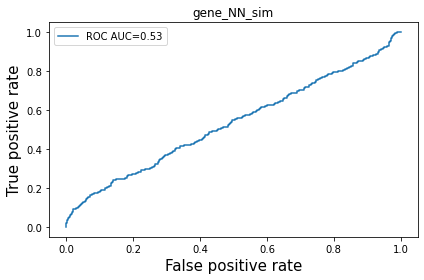

In [21]:
NN_vs_gene('gene_NN_sim')

0.5606002207991652


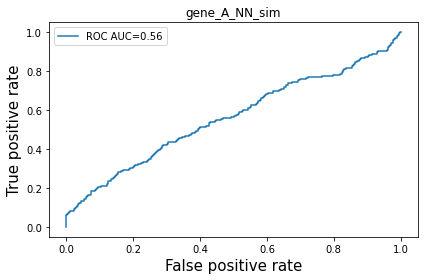

In [45]:
NN_vs_gene('gene_A_NN_sim')

0.554354955808396


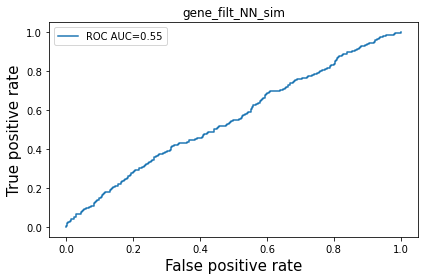

In [46]:
NN_vs_gene('gene_filt_NN_sim')

0.5490632284062247


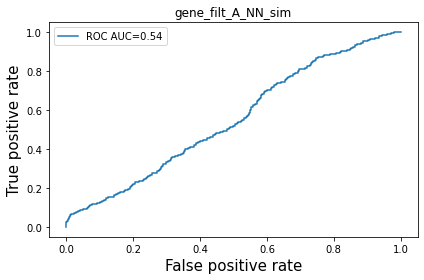

In [47]:
NN_vs_gene('gene_filt_A_NN_sim')

NicheNet vs. single drug perturbation

In [22]:
similarity=pd.read_csv('../results/drug_NN_sim.csv',sep=',',header=0,index_col=0)

In [23]:
meta = pd.read_csv('../results/drug_perturb.csv', sep=',', header=0, index_col=0)

In [24]:
true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
for sample in true_matrix.columns:
    target = meta.loc[int(sample), 'Target']
    fil = lr_network['to'] == target
    ligands = lr_network['from'][fil].unique()
    ligands = list(set(ligands) & set(true_matrix.index))
    true_matrix.loc[ligands, sample] = 1
    if target in true_matrix.index:
        true_matrix.loc[target, sample] = 1

In [25]:
y_pr = similarity.values.reshape((1, -1))[0]
y_tr = true_matrix.values.reshape((1, -1))[0]
fil = ~pd.isna(y_pr)
y_pr = y_pr[fil]
y_tr = y_tr[fil]

In [26]:
fpr, tpr, dummy = ROC(y_tr, y_pr)

0.6374196800529375


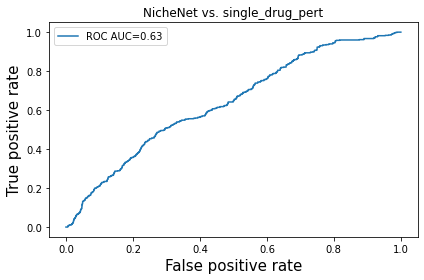

In [29]:
plt.plot(fpr, tpr)
AUC(fpr, tpr)
plt.xlabel('False positive rate', size=15)
plt.ylabel('True positive rate', size=15)
plt.title('NicheNet vs. single_drug_pert', size=12)
plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
plt.tight_layout()
print(AUC(fpr, tpr))
plt.tight_layout()
plt.savefig('../pictures/NN-CREEDS_ROC')

In [54]:
similarity=pd.read_csv('../results/drug_A_NN_sim.csv',sep=',',header=0,index_col=0)

In [55]:
true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
for sample in true_matrix.columns:
    target = meta.loc[int(sample), 'Target']
    fil = lr_network['to'] == target
    ligands = lr_network['from'][fil].unique()
    ligands = list(set(ligands) & set(true_matrix.index))
    true_matrix.loc[ligands, sample] = 1
    if target in true_matrix.index:
        true_matrix.loc[target, sample] = 1

In [56]:
y_pr = similarity.values.reshape((1, -1))[0]
y_tr = true_matrix.values.reshape((1, -1))[0]
fil = ~pd.isna(y_pr)
y_pr = y_pr[fil]
y_tr = y_tr[fil]

In [57]:
fpr, tpr, dummy = ROC(y_tr, y_pr)

0.6016731909501927


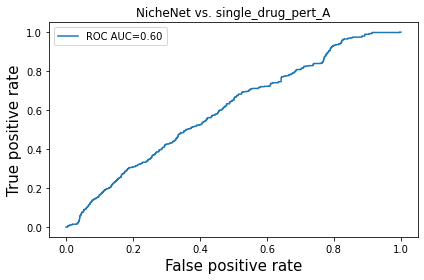

In [58]:
plt.plot(fpr, tpr)
AUC(fpr, tpr)
plt.xlabel('False positive rate', size=15)
plt.ylabel('True positive rate', size=15)
plt.title('NicheNet vs. single_drug_pert_A', size=12)
plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
plt.tight_layout()
print(AUC(fpr, tpr))
plt.tight_layout()

### Comparing LINCS with CREEDs

LINCS vs drug_perturb

In [67]:
similarity=pd.read_csv('../results/drug_pert_gse70138_trt_xpr.csv',sep=',',header=0,index_col=0)

In [68]:
meta = pd.read_csv('../results/drug_perturb.csv', sep=',', header=0, index_col=0)

In [69]:
true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
for sample in true_matrix.columns:
    target = meta.loc[int(sample), 'Target']
    fil = lr_network['to'] == target
    ligands = lr_network['from'][fil].unique()
    ligands = list(set(ligands) & set(true_matrix.index))
    true_matrix.loc[ligands, sample] = 1
    if target in true_matrix.index:
        true_matrix.loc[target, sample] = 1

In [70]:
y_pr = similarity.values.reshape((1, -1))[0]
y_tr = true_matrix.values.reshape((1, -1))[0]
fil = ~pd.isna(y_pr)
y_pr = y_pr[fil]
y_tr = y_tr[fil]

In [71]:
fpr, tpr, dummy = ROC(y_tr, y_pr)

0.25964953677255903

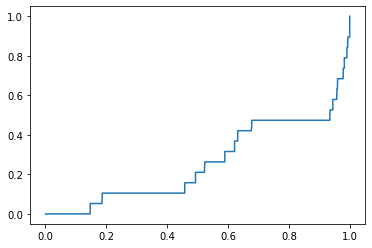

In [72]:
plt.plot(fpr, tpr)
AUC(fpr, tpr)

In [71]:
meta = pd.read_csv('../results/drug_perturb.csv', sep=',', header=0, index_col=0)
meta.head()

,cell_type,ctrl_ids,curator,drug_name,drugbank_id,geo_id,organism,pert_ids,platform,pubchem_cid,smiles,version,Target,Target_type,sign
0,vastus lateralis muscle,GSM801199|GSM801201|GSM801202|GSM801204|GSM801...,MicrotaskManic,Resveratrol,DB02709,GSE32357,human,GSM801198|GSM801200|GSM801203|GSM801205|GSM801...,GPL11532,NaN,Oc1ccc(cc1)/C=C/c1cc(O)cc(c1)O,1.0,AHR,NaN,0
1,vastus lateralis muscle,GSM801199|GSM801201|GSM801202|GSM801204|GSM801...,MicrotaskManic,Resveratrol,DB02709,GSE32357,human,GSM801198|GSM801200|GSM801203|GSM801205|GSM801...,GPL11532,NaN,Oc1ccc(cc1)/C=C/c1cc(O)cc(c1)O,1.0,ESR1,NaN,0
2,vastus lateralis muscle,GSM801199|GSM801201|GSM801202|GSM801204|GSM801...,MicrotaskManic,Resveratrol,DB02709,GSE32357,human,GSM801198|GSM801200|GSM801203|GSM801205|GSM801...,GPL11532,NaN,Oc1ccc(cc1)/C=C/c1cc(O)cc(c1)O,1.0,MTNR1A,NaN,0
3,vastus lateralis muscle,GSM801199|GSM801201|GSM801202|GSM801204|GSM801...,MicrotaskManic,Resveratrol,DB02709,GSE32357,human,GSM801198|GSM801200|GSM801203|GSM801205|GSM801...,GPL11532,NaN,Oc1ccc(cc1)/C=C/c1cc(O)cc(c1)O,1.0,MTNR1B,NaN,0
4,vastus lateralis muscle,GSM801199|GSM801201|GSM801202|GSM801204|GSM801...,MicrotaskManic,Resveratrol,DB02709,GSE32357,human,GSM801198|GSM801200|GSM801203|GSM801205|GSM801...,GPL11532,NaN,Oc1ccc(cc1)/C=C/c1cc(O)cc(c1)O,1.0,NR1I2,NaN,0


In [30]:
def drug_lincsdrug_compare(similarity_name) :
    similarity=pd.read_csv('../results/'+similarity_name+'.csv',sep=',',header=0,index_col=0)
    meta = pd.read_csv('../results/drug_perturb.csv', sep=',', header=0, index_col=0)
    true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
    for sample_bm in true_matrix.columns:
        target = meta.loc[int(sample_bm), 'Target']
        fil = drugs['target'] == target
        samples_lincs = drugs['pert_iname'][fil].unique()
        samples_lincs = list(set(samples_lincs) & set(true_matrix.index))
        true_matrix.loc[samples_lincs, sample_bm] = 1
    y_pr = similarity.values.reshape((1, -1))[0]
    y_tr = true_matrix.values.reshape((1, -1))[0]
    fil = ~pd.isna(y_pr)
    y_pr = y_pr[fil]
    y_tr = y_tr[fil]
    fpr, tpr, dummy = ROC(y_tr, y_pr)
    #ROC
    plt.plot(fpr, tpr)
    AUC(fpr, tpr)
    plt.xlabel('False positive rate', size=15)
    plt.ylabel('True positive rate', size=15)
    plt.title(similarity_name, size=12)
    plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
    plt.tight_layout()
    print(AUC(fpr, tpr))
    
    plt.tight_layout()

In [31]:
similarity=pd.read_csv('../results/drug_pert_trt_drugs.csv',sep=',',header=0,index_col=0)
meta = pd.read_csv('../results/drug_perturb.csv', sep=',', header=0, index_col=0)
true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
sample_bm = '498'
target = meta.loc[int(sample_bm), 'Target']
fil = drugs['target'] == target
samples_lincs = drugs['pert_iname'][fil].unique()
samples_lincs = list(set(samples_lincs) & set(true_matrix.index))
    #fil = lr_network[ 'to'] == target
    #ligands = lr_network['from'][fil].unique()
#drug=list(drugs['pert_iname'].unique())
#drug = list(set(drug) & set(true_matrix.index))
true_matrix.loc[samples_lincs, sample_bm] = 1

0.5591588046423394


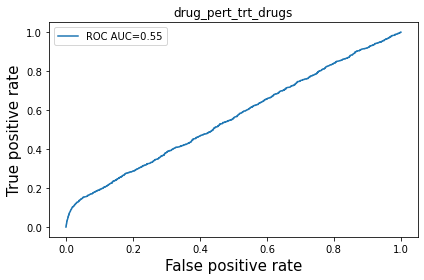

In [32]:
drug_lincsdrug_compare('drug_pert_trt_drugs')

0.5368063851800635


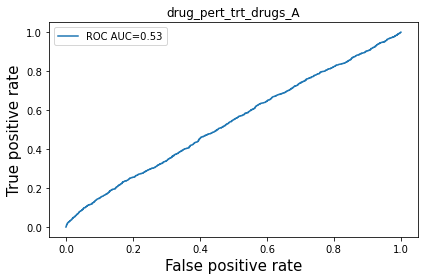

In [106]:
drug_lincsdrug_compare('drug_pert_trt_drugs_A')

0.5298461827129667


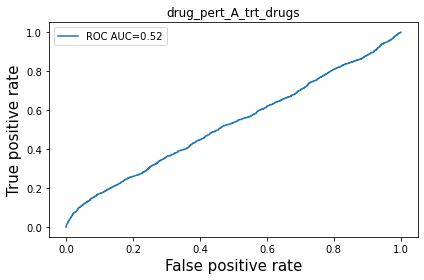

In [109]:
drug_lincsdrug_compare('drug_pert_A_trt_drugs')

0.5709518229566037


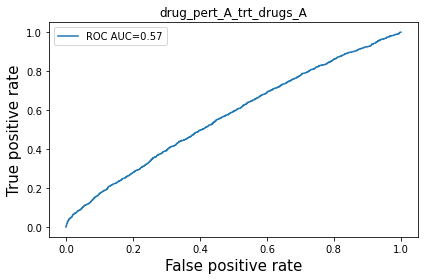

In [110]:
drug_lincsdrug_compare('drug_pert_A_trt_drugs_A')

In [33]:
def drug_lincs_compare(similarity_name) :
    similarity=pd.read_csv('../results/'+similarity_name+'.csv',sep=',',header=0,index_col=0)
    meta = pd.read_csv('../results/drug_perturb.csv', sep=',', header=0, index_col=0)
    true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
    for sample in true_matrix.columns:
        target = meta.loc[int(sample), 'Target']
        fil = lr_network['to'] == target
        ligands = lr_network['from'][fil].unique()
        ligands = list(set(ligands) & set(true_matrix.index))
        true_matrix.loc[ligands, sample] = 1
        if target in true_matrix.index:
            true_matrix.loc[target, sample] = 1
            
    y_pr = similarity.values.reshape((1, -1))[0]
    y_tr = true_matrix.values.reshape((1, -1))[0]
    fil = ~pd.isna(y_pr)
    y_pr = y_pr[fil]
    y_tr = y_tr[fil]
    fpr, tpr, dummy = ROC(y_tr, y_pr)
    #ROC
    plt.plot(fpr, tpr)
    AUC(fpr, tpr)
    plt.xlabel('False positive rate', size=15)
    plt.ylabel('True positive rate', size=15)
    plt.title(similarity_name, size=12)
    plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
    plt.tight_layout()
    print(AUC(fpr, tpr))
    
    plt.tight_layout()

0.25964953677255903


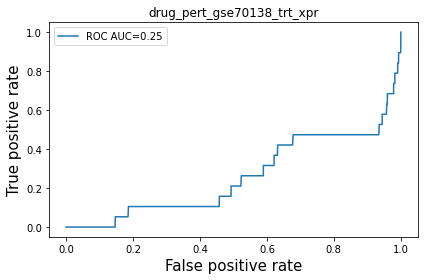

In [84]:
drug_lincs_compare('drug_pert_gse70138_trt_xpr')

0.4994597749683316


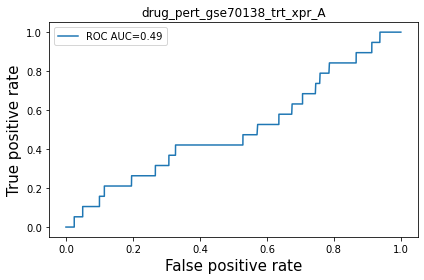

In [91]:
drug_lincs_compare('drug_pert_gse70138_trt_xpr_A')

0.5817178626913765


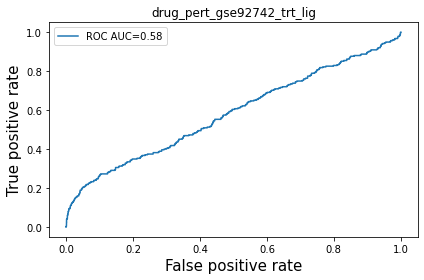

In [35]:
drug_lincs_compare('drug_pert_gse92742_trt_lig')
plt.savefig('../pictures/ligand-CREEDS_ROC')

0.6041855405901855


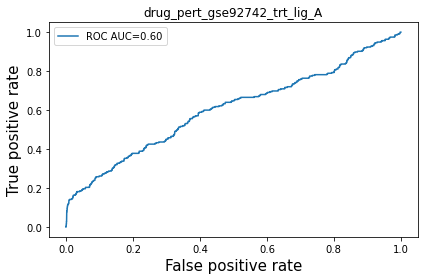

In [41]:
drug_lincs_compare('drug_pert_gse92742_trt_lig_A')

0.5287272563215218


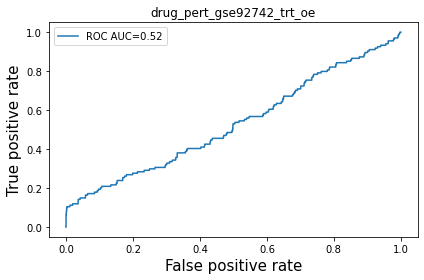

In [42]:
drug_lincs_compare('drug_pert_gse92742_trt_oe')

0.5762226385851681


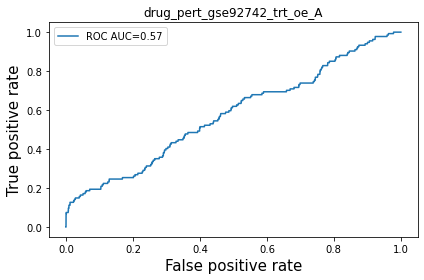

In [43]:
drug_lincs_compare('drug_pert_gse92742_trt_oe_A')

0.538894341642238


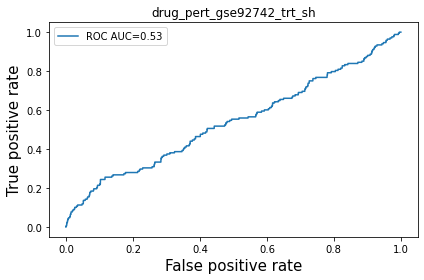

In [44]:
drug_lincs_compare('drug_pert_gse92742_trt_sh')

0.5100165321561676


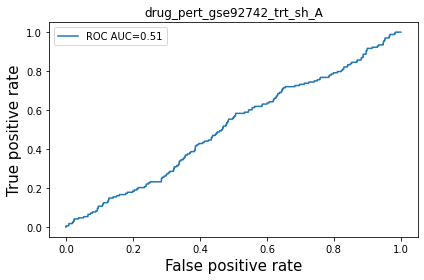

In [45]:
drug_lincs_compare('drug_pert_gse92742_trt_sh_A')

0.5169302969525345


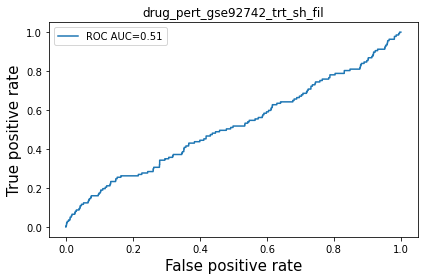

In [46]:
drug_lincs_compare('drug_pert_gse92742_trt_sh_fil')

0.4767421200624377


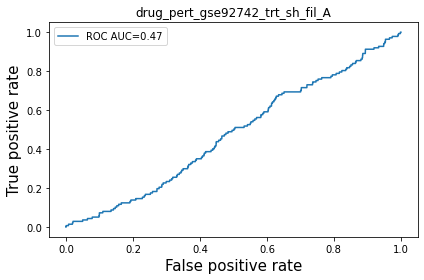

In [47]:
drug_lincs_compare('drug_pert_gse92742_trt_sh_fil_A')

0.6085976503315864


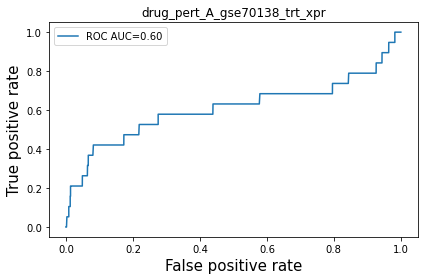

In [48]:
drug_lincs_compare('drug_pert_A_gse70138_trt_xpr')

0.6276607635180447


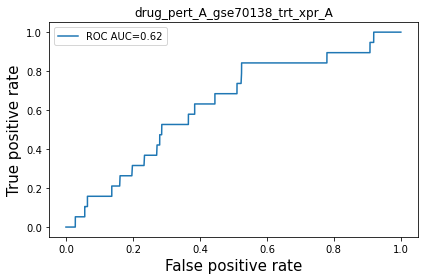

In [49]:
drug_lincs_compare('drug_pert_A_gse70138_trt_xpr_A')

0.5346765798104715


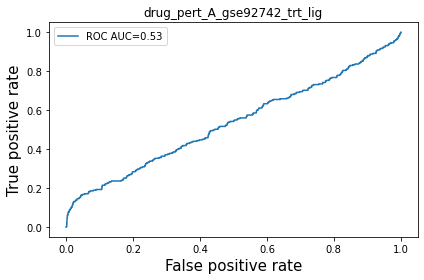

In [50]:
drug_lincs_compare('drug_pert_A_gse92742_trt_lig')

0.6598673255757339


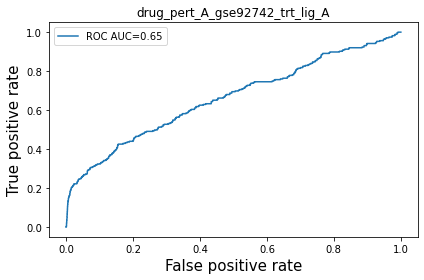

In [51]:
drug_lincs_compare('drug_pert_A_gse92742_trt_lig_A')

0.5386311330969618


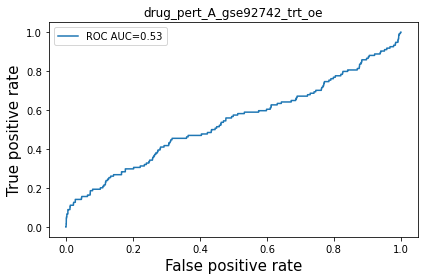

In [52]:
drug_lincs_compare('drug_pert_A_gse92742_trt_oe')

0.5661592110570901


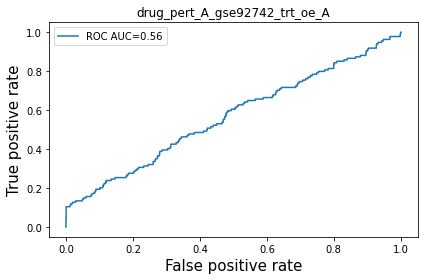

In [53]:
drug_lincs_compare('drug_pert_A_gse92742_trt_oe_A')

0.5083134832761881


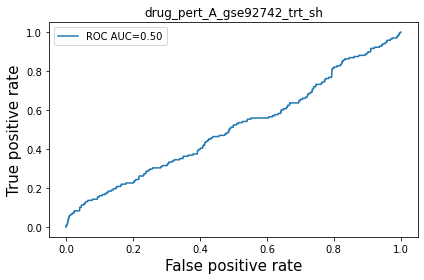

In [54]:
drug_lincs_compare('drug_pert_A_gse92742_trt_sh')

0.4993539944123846


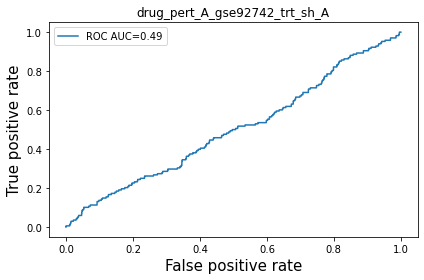

In [55]:
drug_lincs_compare('drug_pert_A_gse92742_trt_sh_A')

0.506882557853297


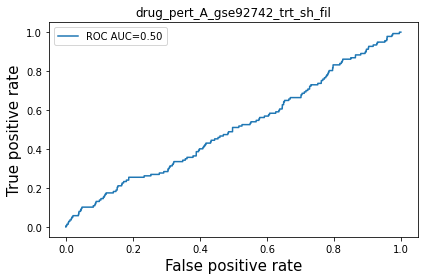

In [56]:
drug_lincs_compare('drug_pert_A_gse92742_trt_sh_fil')

0.46315065226473506


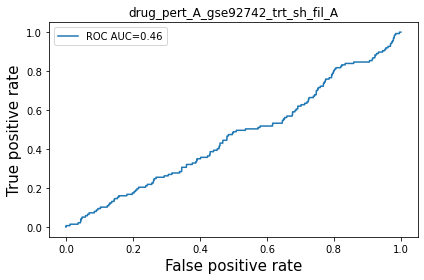

In [57]:
drug_lincs_compare('drug_pert_A_gse92742_trt_sh_fil_A')

In [15]:
def gene_lincsdrug_compare(similarity_name) :
    similarity=pd.read_csv('../results/'+similarity_name+'.csv',sep=',',header=0,index_col=0)
    meta = pd.read_csv('../results/gene_perturb.csv', sep=',', header=0, index_col=0)
    true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
    for sample_bm in true_matrix.columns:
        target = meta.loc[int(sample_bm), 'hs_gene_symbol']
        fil = drugs['target'] == target
        samples_lincs = drugs['pert_iname'][fil].unique()
        samples_lincs = list(set(samples_lincs) & set(true_matrix.index))
        true_matrix.loc[samples_lincs, sample_bm] = 1
    y_pr = similarity.values.reshape((1, -1))[0]
    y_tr = true_matrix.values.reshape((1, -1))[0]
    fil = ~pd.isna(y_pr)
    y_pr = y_pr[fil]
    y_tr = y_tr[fil]
    fpr, tpr, dummy = ROC(y_tr, y_pr)
    #ROC
    plt.plot(fpr, tpr)
    AUC(fpr, tpr)
    plt.xlabel('False positive rate', size=15)
    plt.ylabel('True positive rate', size=15)
    plt.title(similarity_name, size=12)
    plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
    plt.tight_layout()
    print(AUC(fpr, tpr))
    
    plt.tight_layout()

0.6627095890115589


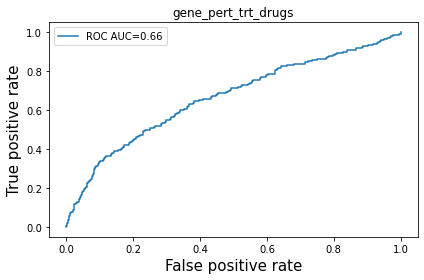

In [17]:
gene_lincsdrug_compare('gene_pert_trt_drugs')

0.591089245765176


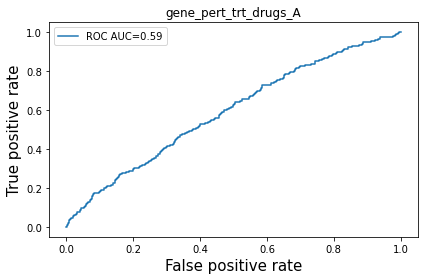

In [18]:
gene_lincsdrug_compare('gene_pert_trt_drugs_A')

0.3854605032694768


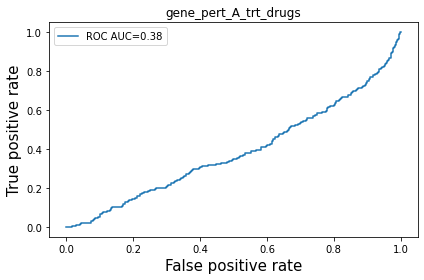

In [19]:
gene_lincsdrug_compare('gene_pert_A_trt_drugs')

0.5606185946230194


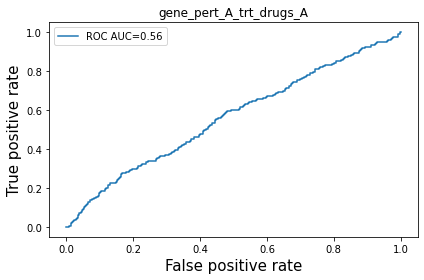

In [20]:
gene_lincsdrug_compare('gene_pert_A_trt_drugs_A')

In [58]:
def gene_lincs_compare(similarity_name) :
    similarity=pd.read_csv('../results/'+similarity_name+'.csv',sep=',',header=0,index_col=0)
    meta = pd.read_csv('../results/gene_perturb.csv', sep=',', header=0, index_col=0)
    true_matrix = pd.DataFrame(0, index=similarity.index, columns=similarity.columns)
    for sample in true_matrix.columns:
        target = meta.loc[int(sample), 'hs_gene_symbol']
        fil = lr_network['to'] == target
        ligands = lr_network['from'][fil].unique()
        ligands = list(set(ligands) & set(true_matrix.index))
        true_matrix.loc[ligands, sample] = 1
        if target in true_matrix.index:
            true_matrix.loc[target, sample] = 1
            
    y_pr = similarity.values.reshape((1, -1))[0]
    y_tr = true_matrix.values.reshape((1, -1))[0]
    fil = ~pd.isna(y_pr)
    y_pr = y_pr[fil]
    y_tr = y_tr[fil]
    fpr, tpr, dummy = ROC(y_tr, y_pr)
    #ROC
    plt.plot(fpr, tpr)
    AUC(fpr, tpr)
    plt.xlabel('False positive rate', size=15)
    plt.ylabel('True positive rate', size=15)
    plt.title(similarity_name, size=12)
    plt.legend(['ROC AUC=' + str(AUC(fpr, tpr))[:4]])
    plt.tight_layout()
    print(AUC(fpr, tpr))
    
    plt.tight_layout()

0.4666666666666667


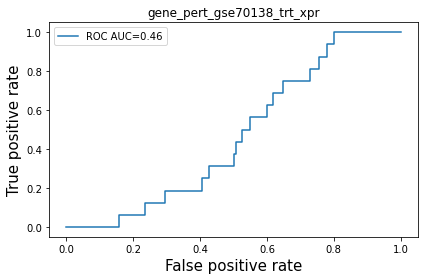

In [59]:
gene_lincs_compare('gene_pert_gse70138_trt_xpr')

0.5329337899543379


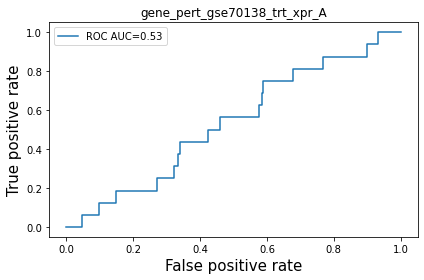

In [60]:
gene_lincs_compare('gene_pert_gse70138_trt_xpr_A')

0.5691807366308694


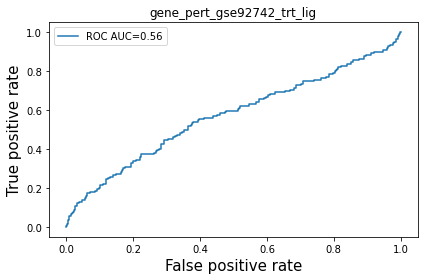

In [61]:
gene_lincs_compare('gene_pert_gse92742_trt_lig')

0.5656744932490426


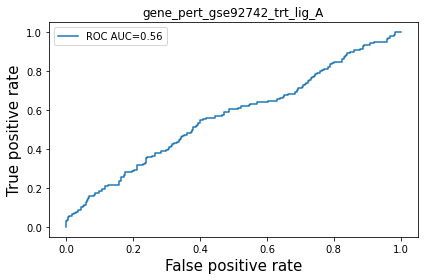

In [62]:
gene_lincs_compare('gene_pert_gse92742_trt_lig_A')

0.5116226075302335


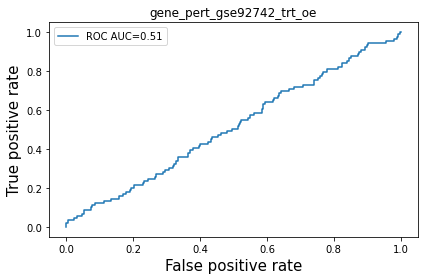

In [63]:
gene_lincs_compare('gene_pert_gse92742_trt_oe')

0.4922181199046482


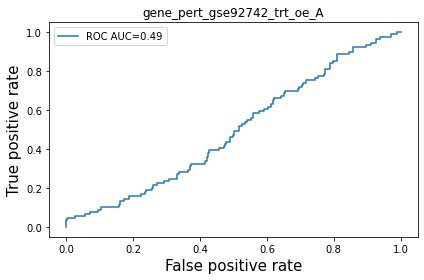

In [64]:
gene_lincs_compare('gene_pert_gse92742_trt_oe_A')

0.5139282494339192


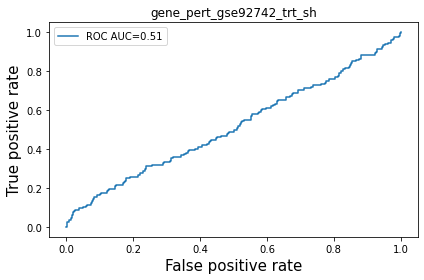

In [65]:
gene_lincs_compare('gene_pert_gse92742_trt_sh')

0.4907149743968543


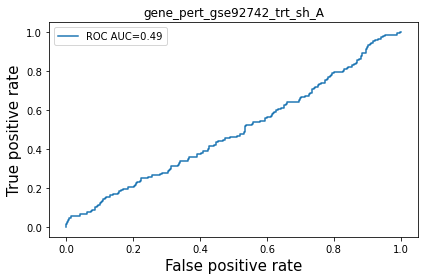

In [66]:
gene_lincs_compare('gene_pert_gse92742_trt_sh_A')

0.5385235508033068


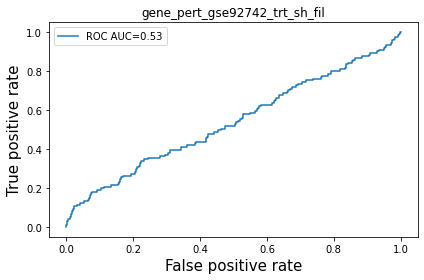

In [67]:
gene_lincs_compare('gene_pert_gse92742_trt_sh_fil')

0.5012723624998604


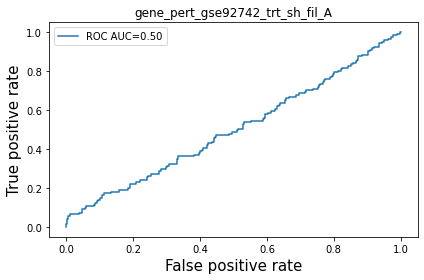

In [68]:
gene_lincs_compare('gene_pert_gse92742_trt_sh_fil_A')

0.5134132420091324


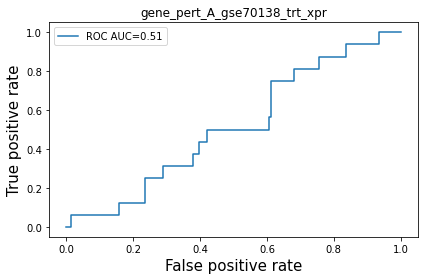

In [69]:
gene_lincs_compare('gene_pert_A_gse70138_trt_xpr')

0.45022831050228307


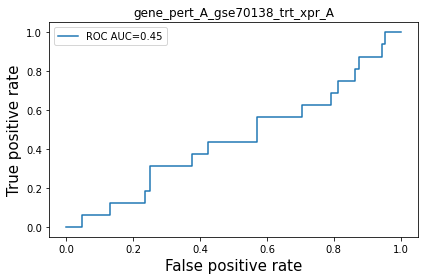

In [120]:
gene_lincs_compare('gene_pert_A_gse70138_trt_xpr_A')

0.5467898536041571


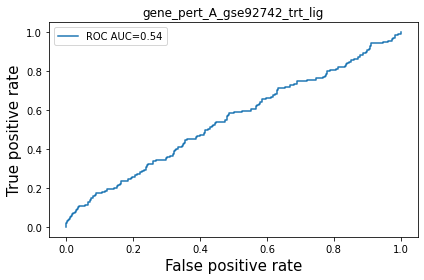

In [70]:
gene_lincs_compare('gene_pert_A_gse92742_trt_lig')

0.5477821167787394


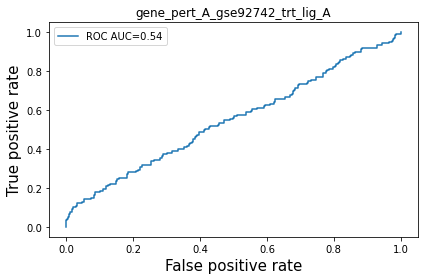

In [71]:
gene_lincs_compare('gene_pert_A_gse92742_trt_lig_A')

0.4992392865939388


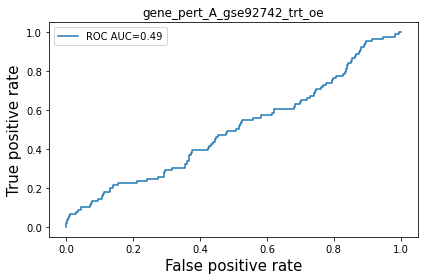

In [72]:
gene_lincs_compare('gene_pert_A_gse92742_trt_oe')

0.47765185553263145


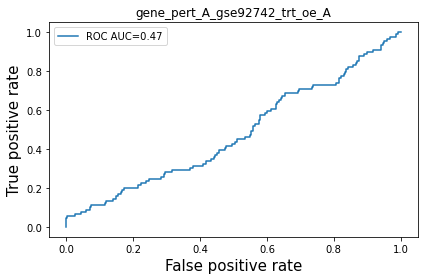

In [73]:
gene_lincs_compare('gene_pert_A_gse92742_trt_oe_A')

0.4791853311831811


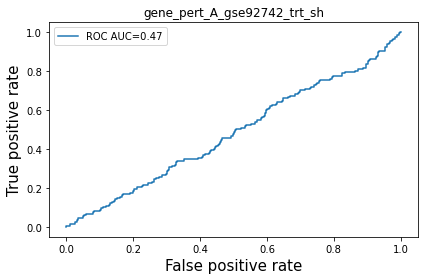

In [74]:
gene_lincs_compare('gene_pert_A_gse92742_trt_sh')

0.5342124904671299


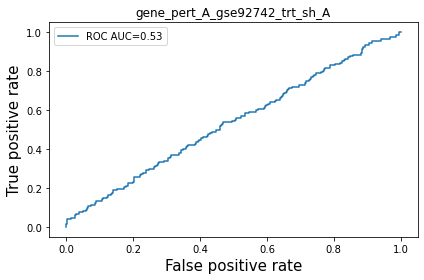

In [75]:
gene_lincs_compare('gene_pert_A_gse92742_trt_sh_A')

0.5118675254131302


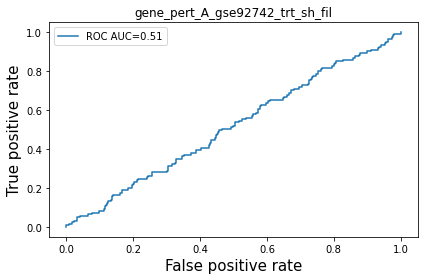

In [76]:
gene_lincs_compare('gene_pert_A_gse92742_trt_sh_fil')

0.537501814558904


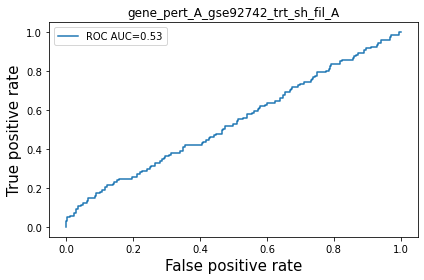

In [77]:
gene_lincs_compare('gene_pert_A_gse92742_trt_sh_fil_A')